In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import fix_yahoo_finance as fyf
plt.style.use('bmh')

Charger les données de l'entreprise "Solvay" à partir du site "yahoo finance" 
De la date "2021/01/02" jusqu'à la date d'aujourd'hui 

In [ ]:
df= fyf.download('OXUR.BR',start='2020-1-1')
print(df)

[*********************100%***********************]  1 of 1 downloaded
             Open   High    Low  Close  Adj Close  Volume
Date                                                     
2020-01-02  2.945  2.960  2.910  2.935      2.935   41582
2020-01-03  2.910  2.915  2.805  2.835      2.835   53116
2020-01-06  2.800  2.800  2.620  2.700      2.700  109514
2020-01-07  3.150  3.430  2.970  3.135      3.135  685337
2020-01-08  3.090  3.195  2.985  3.175      3.175  142454
...           ...    ...    ...    ...        ...     ...
2021-05-24  2.565  2.565  2.515  2.540      2.540   11627
2021-05-25  2.540  2.545  2.520  2.530      2.530   10369
2021-05-26  2.520  2.545  2.520  2.530      2.530    8756
2021-05-27  2.530  2.540  2.485  2.505      2.505   16456
2021-05-28  2.470  2.505  2.470  2.490      2.490   20803

[360 rows x 6 columns]


In [ ]:
df.shape

(360, 6)

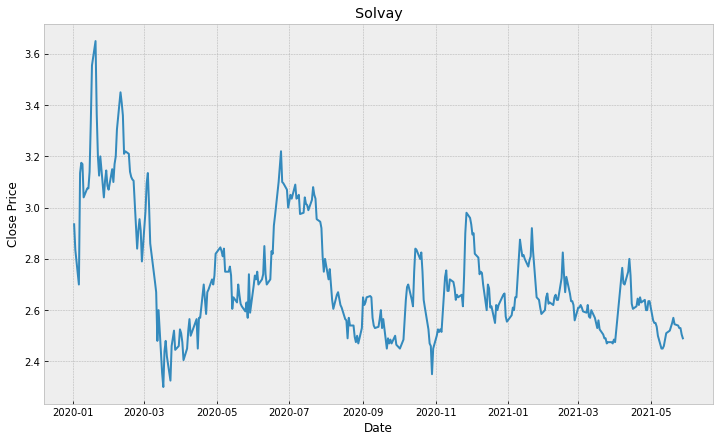

In [ ]:
plt.figure(figsize=(12,7))

plt.title('Solvay')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(df['Adj Close'])
plt.show()

In [ ]:
df = df[['Adj Close']]
df.head()



,Adj Close
Date,
2020-01-02,2.935
2020-01-03,2.835
2020-01-06,2.700
2020-01-07,3.135
2020-01-08,3.175


In [ ]:
days_to_predict = 25
df['Predection']= df.shift(- days_to_predict)
df.head()

,Adj Close,Predection
Date,,
2020-01-02,2.935,3.200
2020-01-03,2.835,3.305
2020-01-06,2.700,3.450
2020-01-07,3.135,3.410
2020-01-08,3.175,3.360


In [ ]:
#Feature data set
X= np.array(df.drop(['Predection'],1))[:-days_to_predict]
print(X)

[[2.935]
 [2.835]
 [2.7  ]
 [3.135]
 [3.175]
 [3.17 ]
 [3.04 ]
 [3.075]
 [3.075]
 [3.14 ]
 [3.33 ]
 [3.555]
 [3.65 ]
 [3.365]
 [3.2  ]
 [3.125]
 [3.2  ]
 [3.04 ]
 [3.105]
 [3.145]
 [3.085]
 [3.07 ]
 [3.15 ]
 [3.1  ]
 [3.17 ]
 [3.2  ]
 [3.305]
 [3.45 ]
 [3.41 ]
 [3.36 ]
 [3.21 ]
 [3.22 ]
 [3.21 ]
 [3.14 ]
 [3.12 ]
 [3.11 ]
 [3.105]
 [2.84 ]
 [2.91 ]
 [2.955]
 [2.91 ]
 [2.79 ]
 [2.985]
 [3.095]
 [3.135]
 [3.01 ]
 [2.86 ]
 [2.75 ]
 [2.71 ]
 [2.67 ]
 [2.48 ]
 [2.6  ]
 [2.355]
 [2.3  ]
 [2.44 ]
 [2.48 ]
 [2.42 ]
 [2.325]
 [2.46 ]
 [2.49 ]
 [2.52 ]
 [2.445]
 [2.46 ]
 [2.525]
 [2.51 ]
 [2.475]
 [2.405]
 [2.45 ]
 [2.52 ]
 [2.565]
 [2.5  ]
 [2.565]
 [2.45 ]
 [2.57 ]
 [2.57 ]
 [2.7  ]
 [2.64 ]
 [2.585]
 [2.67 ]
 [2.68 ]
 [2.72 ]
 [2.7  ]
 [2.735]
 [2.82 ]
 [2.845]
 [2.83 ]
 [2.81 ]
 [2.84 ]
 [2.75 ]
 [2.75 ]
 [2.77 ]
 [2.735]
 [2.605]
 [2.65 ]
 [2.63 ]
 [2.7  ]
 [2.66 ]
 [2.625]
 [2.615]
 [2.595]
 [2.63 ]
 [2.57 ]
 [2.74 ]
 [2.59 ]
 [2.695]
 [2.735]
 [2.72 ]
 [2.75 ]
 [2.7  ]
 [2.72 ]
 [2.74 ]
 

In [ ]:
#Target data set
Y=np.array(df['Predection'])[:-days_to_predict]
print(Y)

[3.2   3.305 3.45  3.41  3.36  3.21  3.22  3.21  3.14  3.12  3.11  3.105
 2.84  2.91  2.955 2.91  2.79  2.985 3.095 3.135 3.01  2.86  2.75  2.71
 2.67  2.48  2.6   2.355 2.3   2.44  2.48  2.42  2.325 2.46  2.49  2.52
 2.445 2.46  2.525 2.51  2.475 2.405 2.45  2.52  2.565 2.5   2.565 2.45
 2.57  2.57  2.7   2.64  2.585 2.67  2.68  2.72  2.7   2.735 2.82  2.845
 2.83  2.81  2.84  2.75  2.75  2.77  2.735 2.605 2.65  2.63  2.7   2.66
 2.625 2.615 2.595 2.63  2.57  2.74  2.59  2.695 2.735 2.72  2.75  2.7
 2.72  2.74  2.85  2.74  2.7   2.72  2.83  2.82  2.93  2.97  3.1   3.16
 3.22  3.1   3.095 3.07  3.    3.025 3.05  3.035 3.09  3.035 3.04  3.05
 2.975 2.98  3.04  3.015 3.01  2.99  3.03  3.08  3.05  3.035 2.955 2.945
 2.92  2.81  2.75  2.8   2.72  2.76  2.7   2.64  2.605 2.66  2.67  2.645
 2.62  2.61  2.565 2.56  2.49  2.57  2.54  2.54  2.495 2.475 2.5   2.47
 2.53  2.65  2.62  2.63  2.65  2.655 2.65  2.57  2.54  2.53  2.535 2.565
 2.6   2.53  2.565 2.45  2.49  2.47  2.485 2.47  2.5   2.465

In [ ]:
x_train, x_test , y_train, y_test = train_test_split(X,Y,test_size=0.2)

In [ ]:
days_prediction = df.drop(['Predection'],1)[:-days_to_predict] #eleminate 'Prediction' column and the last 'days_to_predict' rows
days_prediction = days_prediction.tail(days_to_predict) #select only the last 'days_to_predict' rows from days_prediction dataframe
days_prediction = np.array(days_prediction)

In [ ]:
#Decision Tree Model
tree_model = DecisionTreeRegressor().fit(x_train,y_train)
tree_pred = tree_model.predict(days_prediction)
print(tree_pred)

[2.615      2.70875    2.75       2.58       2.58       2.586
 2.556      2.556      2.586      2.52666667 2.556      2.57
 2.46       2.485      2.85833333 2.71357143 2.64375    2.65
 2.74666667 2.66833333 2.61125    2.58       2.58583333 2.641
 2.72      ]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


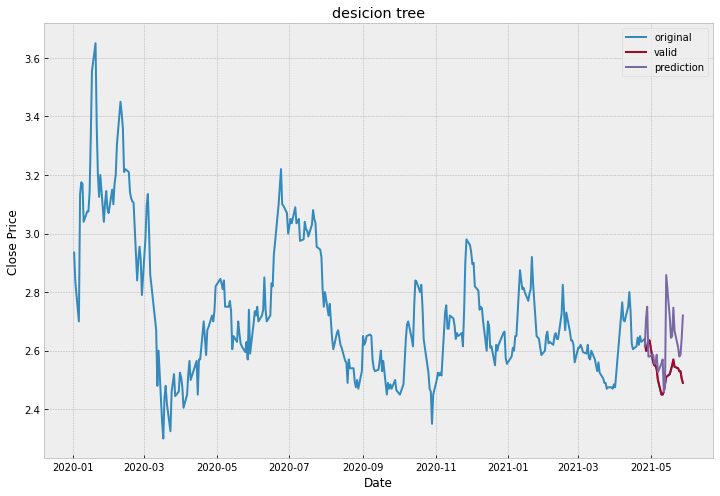

In [ ]:
predictions = tree_pred
valid=df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(12,8))
plt.title('desicion tree')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(df['Adj Close'])
plt.plot(valid[['Adj Close','Predictions']])
plt.legend(['original','valid','prediction'])
plt.show()

In [ ]:
#Linear Regression Model
LR_model = LinearRegression().fit(x_train,y_train)
LR_pred = LR_model.predict(days_prediction)
print(LR_pred)

[2.66400788 2.65979008 2.65737992 2.65557229 2.65557229 2.65316213
 2.65376467 2.65376467 2.65316213 2.65496975 2.65376467 2.68268667
 2.68871208 2.68148158 2.68087904 2.68690446 2.69292987 2.68509683
 2.67184092 2.66943075 2.67063583 2.67425108 2.67123837 2.67485362
 2.67244346]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


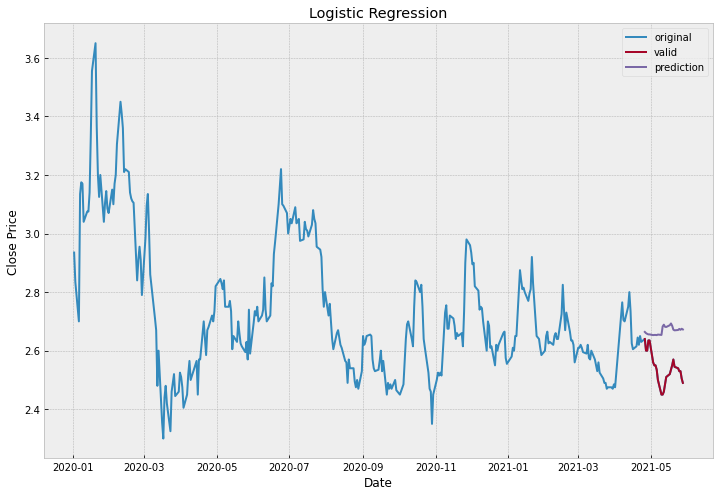

In [ ]:
predictions = LR_pred
valid=df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(12,8))
plt.title('Logistic Regression')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(df['Adj Close'])
plt.plot(valid[['Adj Close','Predictions']])
plt.legend(['original','valid','prediction'])
plt.show()